**Note I am running jupyter notebook from unbuntu (linux)**

Here is a resource to get you up and running using ubuntu on windows to install turicreaete  
https://www.geeksforgeeks.org/guide-to-install-turicreate-in-python3-x/

In order to find your github data file the easiest way is to shift-right click on the data file folder within your github file folder using windows explorer, then select open in linux in order to set the default os folder within this notebook


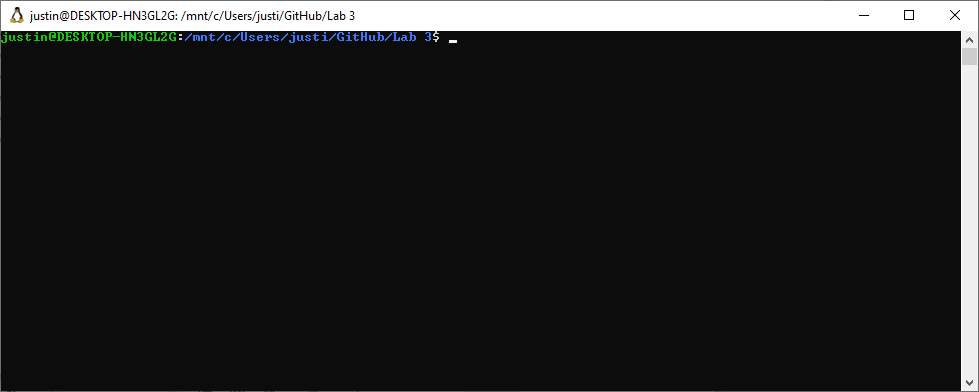

In [1]:
import turicreate as tc
import os

In [2]:
os.chdir('/mnt/c/Users/justi/GitHub/Lab 3/data')

In [3]:
actions = tc.SFrame.read_csv('ratings.csv')
items = tc.SFrame.read_csv('movies.csv')
tags = tc.SFrame.read_csv('tags.csv')

Finished parsing file /mnt/c/Users/justi/Github/Lab 3/data/ratings.csv

Parsing completed. Parsed 100 lines in 0.084648 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/justi/Github/Lab 3/data/ratings.csv

Parsing completed. Parsed 100836 lines in 0.079858 secs.

Finished parsing file /mnt/c/Users/justi/Github/Lab 3/data/movies.csv

Parsing completed. Parsed 100 lines in 0.055536 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/justi/Github/Lab 3/data/movies.csv

Parsing completed. Parsed 9742 lines in 0.055015 secs.

Finished parsing file /mnt/c/Users/justi/Github/Lab 3/data/tags.csv

Parsing completed. Parsed 100 lines in 0.052389 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/justi/Github/Lab 3/data/tags.csv

Parsing completed. Parsed 3683 lines in 0.051227 secs.

In [4]:
tags.head()

userId,movieId,tag,timestamp
2,60756,funny,1445714994
2,60756,Highly quotable,1445714996
2,60756,will ferrell,1445714992
2,89774,Boxing story,1445715207
2,89774,MMA,1445715200
2,89774,Tom Hardy,1445715205
2,106782,drugs,1445715054
2,106782,Leonardo DiCaprio,1445715051
2,106782,Martin Scorsese,1445715056
7,48516,way too long,1169687325


In [5]:
items

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy ...
2,Jumanji (1995),Adventure|Children|Fantasy ...
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride PartII (1995) ...,Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
actions


userId,movieId,rating,timestamp
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
1,70,3.0,964982400
1,101,5.0,964980868
1,110,4.0,964982176
1,151,5.0,964984041
1,157,5.0,964984100


In [7]:
# join the SFrames actions and items together
movies = actions.join(tags, on={'movieId':'movieId','userId':'userId'}, how = 'right')
movies

userId,movieId,rating,timestamp,tag,timestamp.1
2,60756,5.0,1445714980,funny,1445714994
2,60756,5.0,1445714980,Highly quotable,1445714996
2,60756,5.0,1445714980,will ferrell,1445714992
2,89774,5.0,1445715189,Boxing story,1445715207
2,89774,5.0,1445715189,MMA,1445715200
2,89774,5.0,1445715189,Tom Hardy,1445715205
2,106782,5.0,1445714966,drugs,1445715054
2,106782,5.0,1445714966,Leonardo DiCaprio,1445715051
2,106782,5.0,1445714966,Martin Scorsese,1445715056
7,48516,1.0,1169687318,way too long,1169687325


In [8]:
movies = movies.join(items, on = 'movieId', how='left')
del movies['timestamp.1']
movies

userId,movieId,rating,timestamp,tag,title,genres
336,1,4.0,1122227329,pixar,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy ...
474,1,4.0,978575760,pixar,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy ...
567,1,3.5,1525286001,fun,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy ...
62,2,4.0,1528843890,fantasy,Jumanji (1995),Adventure|Children|Fantasy ...
62,2,4.0,1528843890,magic board game,Jumanji (1995),Adventure|Children|Fantasy ...
62,2,4.0,1528843890,Robin Williams,Jumanji (1995),Adventure|Children|Fantasy ...
474,2,3.0,1046886814,game,Jumanji (1995),Adventure|Children|Fantasy ...
289,3,2.5,1143424657,moldy,Grumpier Old Men (1995),Comedy|Romance
289,3,2.5,1143424657,old,Grumpier Old Men (1995),Comedy|Romance
474,5,1.5,1053021982,pregnancy,Father of the Bride PartII (1995) ...,Comedy


In [9]:
training, validation = tc.recommender.util.random_split_by_user(movies, 'userId', 'title',)
model = tc.recommender.create(training, 'userId', 'title')

Warning: Ignoring columns movieId, rating, timestamp, tag, genres;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 2951 observations with 56 users and 1364 items.

Data prepared in: 0.008289s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.059ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 12.216ms                            | 1.75             | 26              |

| 24.226ms                            | 100              | 1364            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.02753s

In [10]:
results = model.recommend(users=None, k=5)
# users=None will give recommendations for all users
# k set the number of recs for each userId

In [11]:
results
# the recommendation output

userId,title,score,rank
567,Up Close and Personal(1996) ...,0.06401869069750064,1
567,Father of the Bride PartII (1995) ...,0.0602803731633124,2
567,Richard III (1995),0.059813083332275675,3
567,"American President, The(1995) ...",0.059813083332275675,4
567,"Cry, the Beloved Country(1995) ...",0.058411214396218276,5
62,"City of Lost Children,The (Cité des enfants ...",0.043478260869565216,1
62,Persuasion (1995),0.043478260869565216,2
62,Leaving Las Vegas (1995),0.043478260869565216,3
62,Get Shorty (1995),0.043478260869565216,4
62,"American President, The(1995) ...",0.043478260869565216,5


In [12]:
model.save('my_model')